<a href="https://colab.research.google.com/github/LidiMG/Machine_Learning/blob/main/Clusterizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='section-zero'></a>

# Análise de Agrupamentos (*Clusterização*)

**Objetivos**: Aprender o que é Clusterização usando a biblioteca `Scikit-Learn`.

## O que é Clusterização?

Classificação de objetos em diferentes grupos, cada um dos quais deve conter os objetos semelhantes

## Quantos Clusters?

* Inércia
	* Soma das distâncias Euclidiana das observações para o centro do cluster mais próximo
	* Observação gráfica
* Silhueta
	* Escore de Desempenho

## Scikit-Learn

Usar a classe [`sklearn.clusters.KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### Argumentos: 
* `n_clusters` - `int` - Número de Clusters a ser extraído
    * padrão - 8
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

### Retorna:
* Objeto `estimator` do Scikit-Learn
    * `.inertia_`: Soma das distâncias Euclidianas das observações para o centro do cluster mais próximo

## Exemplo com um dataset fictício

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

from jupyterthemes import jtplot
jtplot.style()

In [ ]:
blob_centers = np.array(
    [[ 0.2, 2.3],
     [-1.7, 3.3],
     [-2.8, 1.8],
     [-2.1, 2.8],
     [1.1, 3.8],
     [-2.8, 0.8]])
blob_std = np.array([0.4, 0.3, 0.1, 0.05, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=5252)

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$y$", fontsize=14, rotation=0)

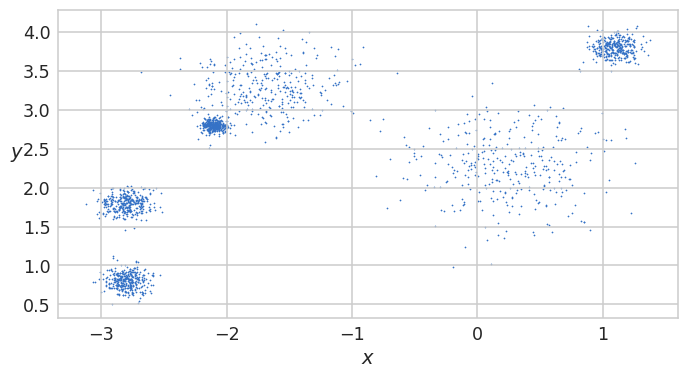

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### `Fit`

Sinta-se à vontade em manipular o número de centroides com a variável `k`

In [ ]:
y

In [ ]:
from sklearn.cluster import KMeans

k = 6
kmeans = KMeans(n_clusters=k, random_state=123)
y_pred = kmeans.fit_predict(X)

/home/diegobilhalva/Documents/virtual_envs/python3107/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Embaixo do Capô

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$y$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

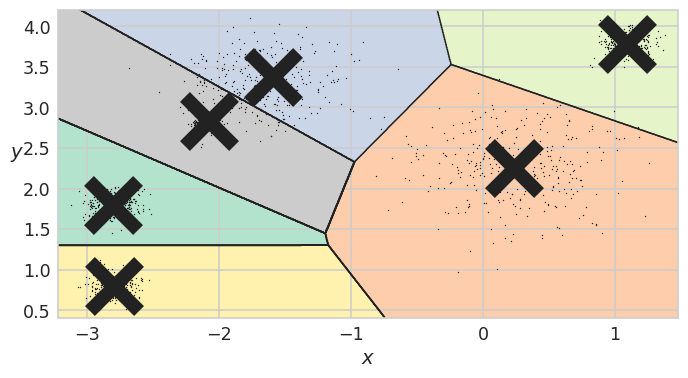

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

#### Animação do Algoritmo K-means

In [ ]:
from IPython.display import YouTubeVideo

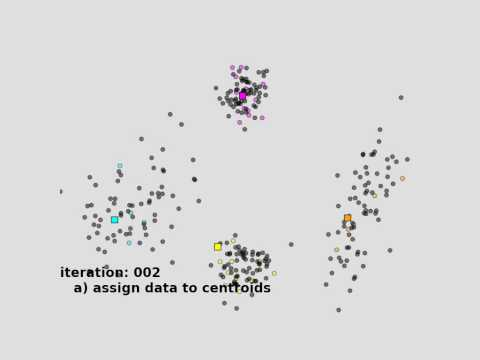

In [ ]:
YouTubeVideo('5I3Ei69I40s', width=900, height=600)

## Número de Clusters?

* `kmeans.inertia_` - Inércia
* `sklearn.metrics.silhouette_score` - Silhueta

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

/home/diegobilhalva/Documents/virtual_envs/python3107/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/diegobilhalva/Documents/virtual_envs/python3107/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


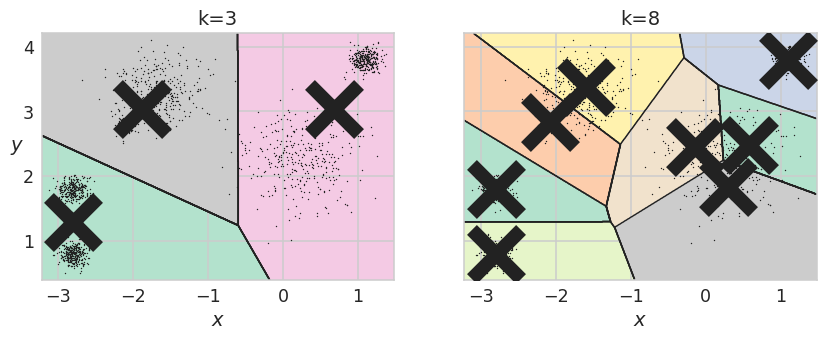

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=123)
kmeans_k8 = KMeans(n_clusters=8, random_state=123)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "k=3", "k=8")
plt.show()

### Plotando as Inércias

/home/diegobilhalva/Documents/virtual_envs/python3107/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/diegobilhalva/Documents/virtual_envs/python3107/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/diegobilhalva/Documents/virtual_envs/python3107/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/diegobilhalva/Documents/virtual_envs/python3107/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

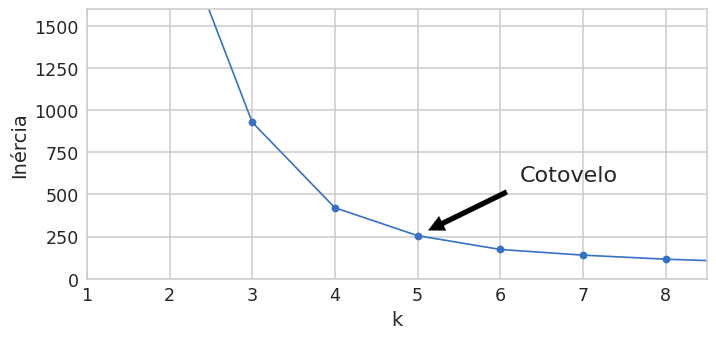

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=123).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Inércia", fontsize=14)
plt.annotate('Cotovelo',
             xy=(5, inertias[4]),
             xytext=(0.65, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1600])
plt.show()

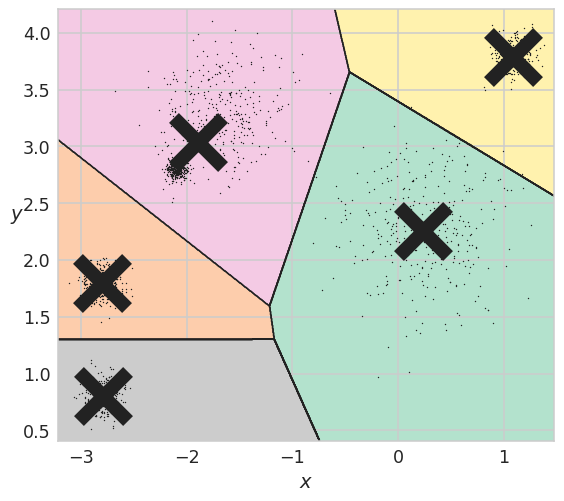

In [ ]:
plot_decision_boundaries(kmeans_per_k[5-1], X)
plt.show()

### Plotando a Silhueta

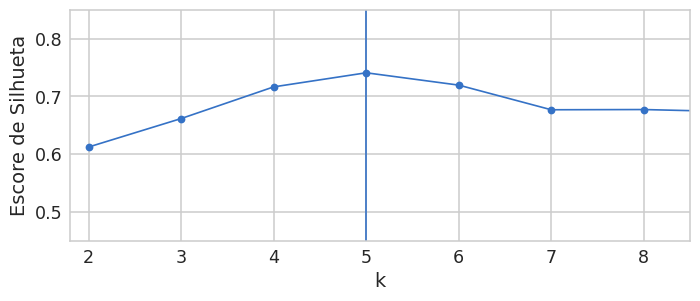

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.vlines(x=[5], ymin=0, ymax=1)
plt.xlabel("k", fontsize=14)
plt.ylabel("Escore de Silhueta", fontsize=14)
plt.axis([1.8, 8.5, 0.45, 0.85])
plt.show()

## Atividade - Clusterização com o dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

>Obs: usar `random_state = 123`

<img src="images/titanic.png" alt="titanic" style="width: 500px;"/>

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = titanic[feature_names].to_numpy()

y = titanic['survived'].to_numpy()

In [ ]:
print('Atributos de X: ', X.shape[1])

Atributos de X:  4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=123)

In [ ]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=123).fit(X_train)
                for k in range(1, 10)]


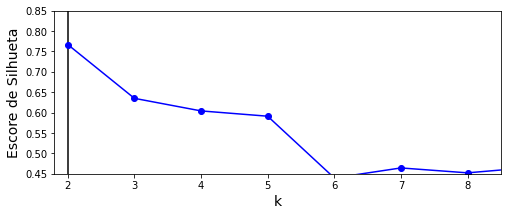

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.vlines(x=[2], ymin=0, ymax=1)
plt.xlabel("k", fontsize=14)
plt.ylabel("Escore de Silhueta", fontsize=14)
plt.axis([1.8, 8.5, 0.45, 0.85])
plt.show()

In [ ]:
y_test_pred = kmeans_per_k[1].labels_
y_test_true = y_train

from sklearn.metrics import classification_report

# target_names = ['morto', 'vivo']

print(classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.97      0.76       318
           1       0.78      0.13      0.22       217

    accuracy                           0.63       535
   macro avg       0.70      0.55      0.49       535
weighted avg       0.68      0.63      0.54       535



In [ ]:
|

# Boston

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/bilhalvadiego/ds-course/main/notebooks/data/BostonHousing.csv')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split

X = df

X_train, X_test = train_test_split(X, test_size=0.25, random_state=123)

In [ ]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')

Tamanho de X_train:  (379, 14) 

Tamanho de X_test:  (127, 14) 



In [ ]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=123).fit(X_train)
                for k in range(1, 10)]

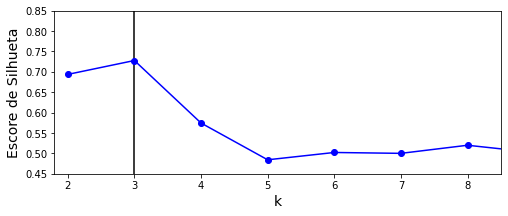

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.vlines(x=[3], ymin=0, ymax=1)
plt.xlabel("k", fontsize=14)
plt.ylabel("Escore de Silhueta", fontsize=14)
plt.axis([1.8, 8.5, 0.45, 0.85])
plt.show()

In [ ]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
335,0.03961,0.0,5.19,0,0.515,6.037,34.5,5.9853,5,224,20.2,396.90,8.01,21.1
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
170,1.20742,0.0,19.58,0,0.605,5.875,94.6,2.4259,5,403,14.7,292.29,14.43,17.4
241,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300,16.6,394.62,12.40,20.1
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2


In [ ]:
X_train['cluster'] = kmeans_per_k[2].labels_

In [ ]:
X_test['cluster'] = kmeans_per_k[2].predict(X_test)

In [ ]:
df_cluster = pd.concat([X_train, X_test])
df_cluster.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cluster
335,0.03961,0.0,5.19,0,0.515,6.037,34.5,5.9853,5,224,20.2,396.90,8.01,21.1,0
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4,0
170,1.20742,0.0,19.58,0,0.605,5.875,94.6,2.4259,5,403,14.7,292.29,14.43,17.4,0
241,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300,16.6,394.62,12.40,20.1,0
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,1


In [ ]:
kmeans_per_k[2].labels_

centros = pd.DataFrame(kmeans_per_k[2].cluster_centers_)
centros.columns = df_cluster.loc[:,'crim':'medv'].columns
centros['labels_code'] = [2,0,1]
centros.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,labels_code
0,0.383459,1.471841e+01,8.435415,6.498195e-02,0.510841,6.399166,60.530325,4.416479,4.537906,310.783394,17.834657,383.330830,10.453718,24.898195,2
1,11.528440,7.105427e-15,18.760274,6.849315e-02,0.673205,5.962260,90.695890,2.051700,22.630137,669.082192,20.193151,378.345479,18.119315,16.842466,0
2,14.537001,5.329071e-15,18.151034,-6.938894e-18,0.676103,5.988552,89.906897,2.000417,23.344828,656.931034,20.010345,61.114138,21.431034,13.206897,1
